**Part 3:** Questions and answers about V transports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from salishsea_tools.nc_tools import scDataset
from matplotlib import animation
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/transport_fluxes/')
import functions_transport_V
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions

#note: the cross section at the shelf break plane is looking out of the canyon from the inside.

In [2]:
import importlib
importlib.reload(functions_transport_V)

<module 'functions_transport_V' from '/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/transport_fluxes/functions_transport_V.py'>

In [3]:
dirname = '/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/agrif_wind_timestep/'
filename = '1_mesh_mask.nc'
gdepv, vmask, mbathy, e1v, e3v_0 = functions_transport_V.get_variables_planes(dirname, filename)

ind_plane, ind_shelf, ind_bottom, ind_axis, ind_rimW, ind_rimE, ind_half, ind_shfW, ind_shfE,\
depth_shelf, depth_bottom, depth_half, area_j = functions_transport_V.get_indices_V(gdepv, vmask, mbathy, e1v, e3v_0)

filepattern = "1_MCKNZ_1h_20170101_20170120_*"
vomecrty = functions_transport_V.get_variables_fluxes(dirname, filepattern, ind_plane, vmask)

Qj_all = functions_transport_V.calculate_flux_V_evolution(vomecrty, area_j)

Qj_shfW, Qj_rimW, Qj_rimE, Qj_shfE,\
Qj_topW, Qj_topE, Qj_botW, Qj_botE = functions_transport_V.extract_sections(
    Qj_all, ind_shelf, ind_bottom, ind_axis, ind_rimW, ind_rimE, ind_half, ind_shfW, ind_shfE)

tot_Qj_shfW, tot_Qj_rimW, tot_Qj_rimE, tot_Qj_shfE,\
tot_Qj_topW, tot_Qj_topE, tot_Qj_botW, tot_Qj_botE = functions_transport_V.total_sections(
    (1,2), Qj_shfW, Qj_rimW, Qj_rimE, Qj_shfE, Qj_topW, Qj_topE, Qj_botW, Qj_botE, 12)

val_Qj_shfW, val_Qj_rimW, val_Qj_rimE, val_Qj_shfE,\
val_Qj_topW, val_Qj_topE, val_Qj_botW, val_Qj_botE = functions_transport_V.total_sections(
    None, Qj_shfW, Qj_rimW, Qj_rimE, Qj_shfE, Qj_topW, Qj_topE, Qj_botW, Qj_botE, 1)

ind_plane 178
ind_shelf 10
depth_shelf 91.875
ind_bottom 60
depth_bottom 534.672
ind_axis 110
ind_rimW 48
ind_rimE 172
ind_half 25
depth_half 223.125
ind_shfW 5
ind_shfE 215


In [4]:
labels = ['shfW', 'rimW', 'rimE', 'shfE', 'topW', 'topE', 'botW', 'botE']
fluxes_tot = [tot_Qj_shfW, tot_Qj_rimW, tot_Qj_rimE, tot_Qj_shfE, tot_Qj_topW, tot_Qj_topE, tot_Qj_botW, tot_Qj_botE]
fluxes_val = [val_Qj_shfW, val_Qj_rimW, val_Qj_rimE, val_Qj_shfE, val_Qj_topW, val_Qj_topE, val_Qj_botW, val_Qj_botE]
colors = ['darkred', 'orangered', 'dodgerblue', 'darkblue', 'darkred', 'darkblue', 'orangered', 'dodgerblue']
xs = np.arange(Qj_all.shape[0])

vm = functions_transport_V.get_limits(fluxes_tot)

In [5]:
def plot_formatting(ax, vm, title):
    ax.legend(ncol = 8, loc=2, fontsize=16)
    ax.axhline(0, c='k', lw=2, linestyle='--')
    ax.set_ylim([-1*vm, vm])
    ax.set_xlim([0, len(xs)])
    ax.fill_between(xs, 0, vm, facecolor='#E19A92', alpha=0.5)
    ax.fill_between(xs, 0, -1*vm, facecolor='#92CFE1', alpha=0.5)
    ax.set_title(title, fontsize=20)
    return ax

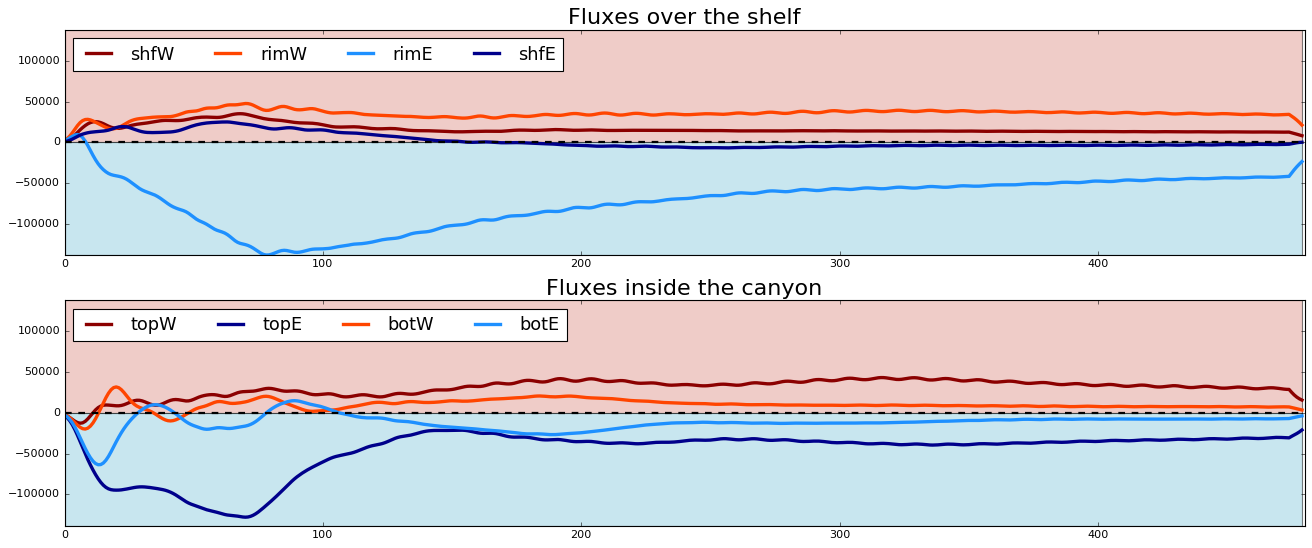

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(20, 8))
for i in range(4):
    ax[0].plot(xs, fluxes_tot[i], label=labels[i], c=colors[i], lw=3)
for i in range(4, 8):
    ax[1].plot(xs, fluxes_tot[i], label=labels[i], c=colors[i], lw=3)
plot_formatting(ax[0], vm, 'Fluxes over the shelf')
plot_formatting(ax[1], vm, 'Fluxes inside the canyon')

In [7]:




print('What is the difference between onshore and offshore transports?')



print('What is the difference between upstream and downstream transports?')

What is the difference between onshore and offshore transports?
What is the difference between upstream and downstream transports?


In [8]:
def get_flux_dicts(labels, fluxes_val):
    
    all_fluxes_val = {}
    for lab, flux in zip (labels, fluxes_val):
        all_fluxes_val[lab] = flux
    
    onshore = {k: v for k, v in all_fluxes_val.items() if v < 0}

    offshore = {k: v for k, v in all_fluxes_val.items() if v > 0}

    canyon = {k: v for k, v in all_fluxes_val.items() if 'bot' in k or 'top' in k}

    shelf = {k: v for k, v in all_fluxes_val.items() if 'shf' in k or 'rim' in k}

    upstream = {k: v for k, v in all_fluxes_val.items() if 'E' in k}

    downstream = {k: v for k, v in all_fluxes_val.items() if 'W' in k}
    
    return all_fluxes_val, onshore, offshore, canyon, shelf, upstream, downstream

# ------------------------------------------------------------------------------------------------

def find_max_dict(sub_dict):
    max_k = max(sub_dict, key=lambda y: abs(sub_dict[y]))
    max_v = sub_dict[max_k]
    if 'W' in max_k:
        max_k = max_k.split('W')[0] + '-downstream'
    elif 'E' in max_k:
        max_k = max_k.split('E')[0] + '-upstream'
    return max_k, max_v

# ------------------------------------------------------------------------------------------------

def define_direction(value):
    if value < 0:
        direction = 'onshore'
    elif value > 0:
        direction = 'offshore'
    return direction

In [9]:
all_fluxes_val, onshore, offshore, canyon, shelf, upstream, downstream = get_flux_dicts(labels, fluxes_val)

In [10]:
print('onshore', onshore)
print('offshore', offshore)
print('canyon', canyon)
print('shelf', shelf)
print('upstream', upstream)
print('downstream', downstream)

onshore {'rimE': -34465276.0, 'botE': -5721522.0, 'topE': -22427436.0}
offshore {'rimW': 16802470.0, 'topW': 14738997.0, 'shfE': 787558.25, 'botW': 4756632.0, 'shfW': 7872860.5}
canyon {'topW': 14738997.0, 'botE': -5721522.0, 'botW': 4756632.0, 'topE': -22427436.0}
shelf {'rimW': 16802470.0, 'shfE': 787558.25, 'rimE': -34465276.0, 'shfW': 7872860.5}
upstream {'shfE': 787558.25, 'rimE': -34465276.0, 'botE': -5721522.0, 'topE': -22427436.0}
downstream {'rimW': 16802470.0, 'topW': 14738997.0, 'botW': 4756632.0, 'shfW': 7872860.5}


In [11]:
onshore_max_k, onshore_max_v = find_max_dict(onshore)
offshore_max_k, offshore_max_v = find_max_dict(offshore)
canyon_max_k, canyon_max_v = find_max_dict(canyon)
shelf_max_k, shelf_max_v = find_max_dict(shelf)
upstream_max_k, upstream_max_v = find_max_dict(upstream)
downstream_max_k, downstream_max_v = find_max_dict(downstream)

In [12]:
dir_canyon_max = define_direction(canyon_max_v)
dir_shelf_max = define_direction(shelf_max_v)
dir_upstream_max = define_direction(upstream_max_v)
dir_downstream_max = define_direction(downstream_max_v)

In [13]:
print('Which transport is highest over the shelf? In which direction? \n', 
      shelf_max_k, dir_shelf_max)

Which transport is highest over the shelf? In which direction? 
 rim-upstream onshore


In [14]:
print('Which transport is highest inside the canyon? In which direction?\n',
     canyon_max_k, dir_canyon_max)

Which transport is highest inside the canyon? In which direction?
 top-upstream onshore


In [15]:
print('Which transport is highest on the upstream side?\n', 
     upstream_max_k, dir_upstream_max)

Which transport is highest on the upstream side?
 rim-upstream onshore


In [16]:
print('Which transport is highest on the downstream side?\n',
     downstream_max_k, dir_downstream_max)

Which transport is highest on the downstream side?
 rim-downstream offshore


In [17]:
print('Which transport is highest in the onshore direction?\n',
     onshore_max_k)

Which transport is highest in the onshore direction?
 rim-upstream


In [18]:
print('Which transport is highest in the offshore direction?\n',
     offshore_max_k)

Which transport is highest in the offshore direction?
 rim-downstream
